# Content List
### Step 1 - Import Libraries and Data
### Step 2 - Address any PII data
### Step 3 - Create a regional sementation of data
### Step 4 - Create low-activity exclusion flag
### Step 5, 6, 7, 8, 9 (Visualizations)
    Profile based on age
    Age profile by region
    Income
    Dependants
    Product price range
    Customer loyalty status, ordering habits
    Percentage of customers per region, by department

# Step 1 - Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path to main project folder
path = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/05-2023 Instacart Basket Analysis'

In [3]:
# import customers_ords_prods_merged.pkl dataframe
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','fully_combined.pkl'))

# Step 2 - Address any PII data.

In [ ]:
# check for PII concerns by printing a few rows of the df dataframe
df.head(5)

In [8]:
# check for PII concerns by printing list of columns in df dataframe
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'customer_activity'],
      dtype='object')

### Two columns "First Name" and "Last Name" are personally identifiable information. They are not necessary for our analysis either so I removed these columns during a previous assignment using the drop() command, which is why the columns are not in this dataframe.

# Step 3 - Create a regional segmentation of the data.

In [4]:
# create empty container
region = []
# create "region" column based on the "state" column and Wikipedia region information
for value in df['State']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [5]:
# put results of previous line into column named 'region'
df['region'] = region

In [11]:
# check frequency values for new column 'region' in dataframe df
df['region'].value_counts(dropna=False)

South        10791885
West          8921021
Midwest       6969217
Northeast     5722736
Name: region, dtype: int64

In [6]:
# create a crosstab between 'region' and 'spending_flag'
region_spending = pd.crosstab(df['region'],df['spending_flag'], dropna = False)

In [13]:
# check output of region_spending crosstab
region_spending

spending_flag,High spender,Low spender
region,,
Midwest,139504,6829713
Northeast,108225,5614511
South,209691,10582194
West,176825,8744196


# Step 4 - Create low-activity exclusion flag and exclude from data.

In [7]:
# create a column 'customer_activity' where 'low activity' customers have less than 5 orders
df.loc[df['max_order']>=5, 'customer_activity'] = 'high activity'
df.loc[df['max_order']<5, 'customer_activity'] = 'low activity'

In [15]:
# check frequency values of new column 'customer_activity'
df['customer_activity'].value_counts(dropna = False)

high activity    30964564
low activity      1440295
Name: customer_activity, dtype: int64

In [8]:
# create subset of high activity customers
df_high = df[df['customer_activity']=='high activity']

In [ ]:
# export df_high to pickle file
df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity.pkl'))

# Step 5, 6, 7, 8, 9

## Profile based on Age

In [9]:
# define 'Senior' as older than 65, 'Middle-age' as greater than 40 and younger than or equal to 65, 'Young adult' as younger than or equal to 40
df.loc[df['Age']>65,'age_flag'] = 'Senior'
df.loc[(df['Age']<=65) & (df['Age']>40),'age_flag'] = 'Middle-age'
df.loc[df['Age']<=40,'age_flag'] = 'Young adult'

In [18]:
# check frequency of 'age_flag' column
df['age_flag'].value_counts(dropna = False)

Middle-age     12646712
Young adult    11670046
Senior          8088101
Name: age_flag, dtype: int64

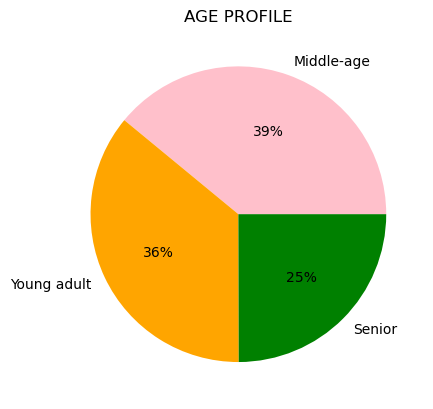

In [10]:
# create a pie chart using age_flag column
age_profile = df['age_flag'].value_counts().plot.pie(title = 'AGE PROFILE', label = '',autopct=('%1.f%%'), colors = ['pink','orange','green'])

In [ ]:
# export the pie chart
age_profile.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'age_profile.png'))

In [10]:
# change setting in pandas to allow all columns in dataframe to show
pd.options.display.max_columns = None

In [18]:
# check output of df after adding columns
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,Young adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,Young adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,Young adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,Young adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,Young adult


In [11]:
# create age statistics chart
age_statistics = df.groupby(['age_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['sum','max','mean']})

In [20]:
# check output of age_statistics
age_statistics

days_since_prior_order                       prices        \
                               min   max       mean         sum   max   
age_flag                                                                
Middle-age                     0.0  30.0  11.113621  98539809.2  25.0   
Senior                         0.0  30.0  11.080922  63031186.7  25.0   
Young adult                    0.0  30.0  11.109790  90855124.7  25.0   

                       
                 mean  
age_flag               
Middle-age   7.792981  
Senior       7.794295  
Young adult  7.786553

### All age groups have an average of 11 days between orders and the same average item price of 7.79.

## Age Profile by Region

In [12]:
# create a crosstab between region and age
region_age = pd.crosstab(df['region'],df['age_flag'], dropna = False)

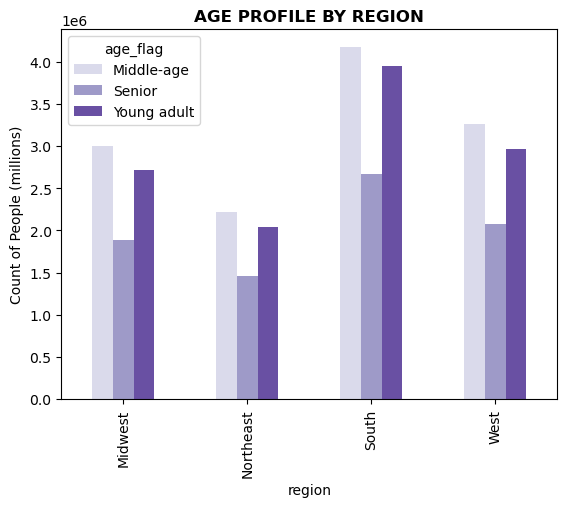

In [14]:
# create a bar chart between age and region
regions_age_bar = region_age.plot.bar(color=sns.color_palette('Purples',3))
plt.title('AGE PROFILE BY REGION',fontweight='bold')
plt.ylabel('Count of People (millions)')
plt.show()

In [21]:
# export regions_age_bar chart
regions_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regions_age_bar.png'))

In [14]:
# import departments_wrangled.csv file
df_dept = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'))

In [15]:
# rename column headers to fix labels
df_dept.rename(columns ={'Unnamed: 0':'department_id'}, inplace=True)

In [25]:
# check output of df_dept
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [16]:
# merge df_dept with df to create updated dataframe using 'department_id' as key
df_dept_age = df[['age_flag', 'department_id']].merge(df_dept, on = 'department_id')

In [17]:
# create a crosstab between department and age
dept_age = pd.crosstab(df_dept_age['department'],df_dept_age['age_flag'], dropna=False)

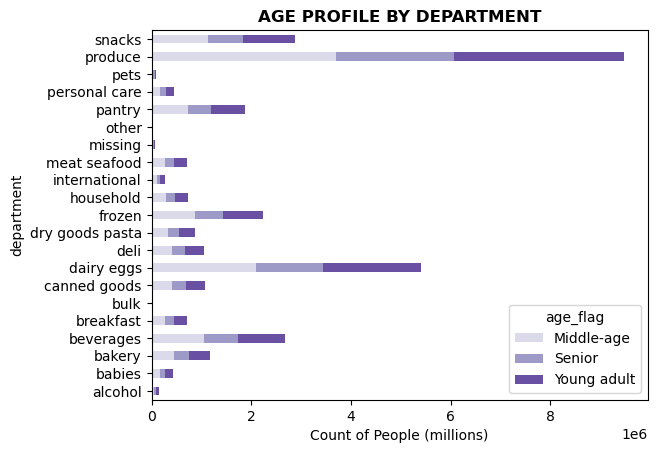

In [28]:
# create a stacked bar chart of age and department
dept_age_stack = dept_age.plot.barh(stacked=True,color=sns.color_palette('Purples',3))
plt.title('AGE PROFILE BY DEPARTMENT',fontweight='bold')
plt.xlabel('Count of People (millions)')
plt.show()

### The top 3 departments across all 3 age groups are produce, dairy, and snacks.

In [ ]:
# export the stacked bar graph
dept_age_stack.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_age_stack.png'))

## Income

In [18]:
# define 'low income' as less than or equal to $50,000, define 'middle income' as greater than $50,000 and less than or equal to $120,000, and define 'high income' as greater than $120,000.
df.loc[df['income']<=50000, 'income_flag'] = 'low income'
df.loc[(df['income']>50000) & (df['income']<=120000), 'income_flag'] = 'middle income'
df.loc[df['income']>120000, 'income_flag'] = 'high income'

In [30]:
# check frequency of 'income_flag' values
df['income_flag'].value_counts(dropna=False)

middle income    19239676
high income       9571100
low income        3594083
Name: income_flag, dtype: int64

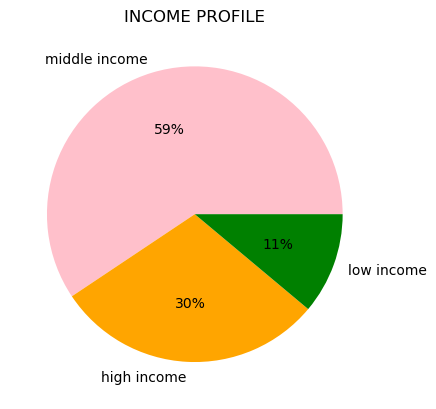

In [31]:
# create pie chart showing income_flag percentages
income_pie = df['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='',autopct=('%1.f%%'), colors = ['pink','orange','green'])

In [ ]:
# export the income pie chart
income_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_pie.png'))

In [19]:
# create income statistics chart
income_stats = df.groupby(['income_flag']).agg({'days_since_prior_order':['max','mean'],'prices':['max','mean','sum']})

In [33]:
# print income_stats
income_stats

days_since_prior_order            prices                       
                                 max       mean    max      mean          sum
income_flag                                                                  
high income                     30.0  11.029443   25.0  7.957993   76131352.8
low income                      30.0  11.587220   25.0  6.696985   24069521.7
middle income                   30.0  11.051922   25.0  7.912328  152225246.1

### Customers in 'middle income' category make up highest amount of revenue for instacart.

In [20]:
# create crosstab between income and region
income_region = pd.crosstab(df['region'],df['income_flag'],dropna=False)

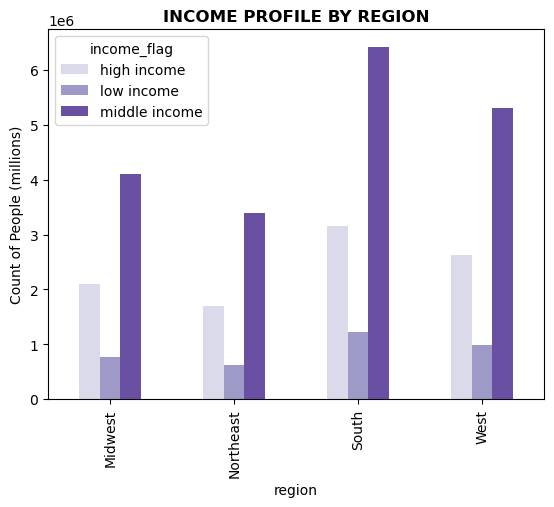

In [35]:
# create a bar chart of income vs. region
income_regions = income_region.plot.bar(color=sns.color_palette('Purples',3))
plt.title('INCOME PROFILE BY REGION',fontweight='bold')
plt.ylabel('Count of People (millions)')
plt.show()

In [ ]:
# export the income vs. region bar graph
income_regions.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_regions.png'))

In [21]:
# create crosstab between income and department
dept_income = pd.crosstab(df_dept_age['department'],df['income_flag'], dropna=False)

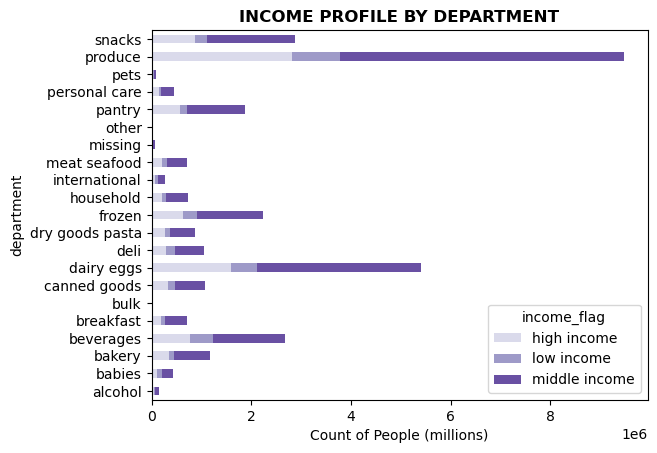

In [37]:
department_income = dept_income.plot.barh(stacked=True,color=sns.color_palette('Purples',3))
plt.title('INCOME PROFILE BY DEPARTMENT',fontweight='bold')
plt.xlabel('Count of People (millions)')
plt.show()

### The top 3 departments for all three income_flags are produce, dairy, and snacks.

In [ ]:
# export department_income stacked bar graph
department_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_income.png'))

## Dependants

In [22]:
# create 'family_flag' by making 0 dependants mean 'Single' and any number of dependants other than 0 mean 'Family'
df.loc[df['n_dependants']==0, 'family_flag'] = 'Single'
df.loc[df['n_dependants']!=0, 'family_flag'] = 'Family'

In [39]:
# check frequency values for 'family_flag'
df['family_flag'].value_counts(dropna=False)

Family    24307356
Single     8097503
Name: family_flag, dtype: int64

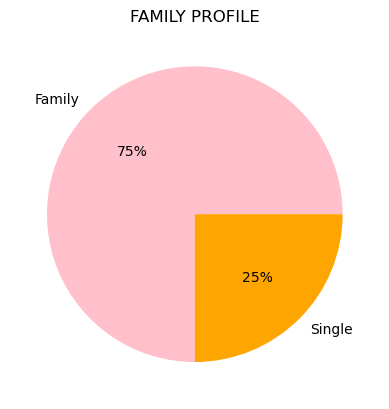

In [40]:
# create a pie chart showing family_flag distributions
family_profile = df['family_flag'].value_counts().plot.pie(title='FAMILY PROFILE',label='',autopct=('%1.f%%'),colors = ['pink','orange'])

In [47]:
# export the family_profile pie chart
family_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_profile.png'))

In [23]:
# create subset of family_flag descriptive statistics
family_stats = df.groupby(['family_flag']).agg({'days_since_prior_order':['max','mean'], 'prices':['max','mean','sum']})

In [49]:
# print family_stats
family_stats

days_since_prior_order            prices                       
                               max       mean    max      mean          sum
family_flag                                                                
Family                        30.0  11.111834   25.0  7.791334  189356344.5
Single                        30.0  11.080805   25.0  7.789975   63069776.1

### There's a higher proportion of customers with dependants (Family), so families generate the most revenue for instacart.

In [24]:
# create a crosstab between family_flag and region
region_family=pd.crosstab(df['region'],df['family_flag'], dropna=False)

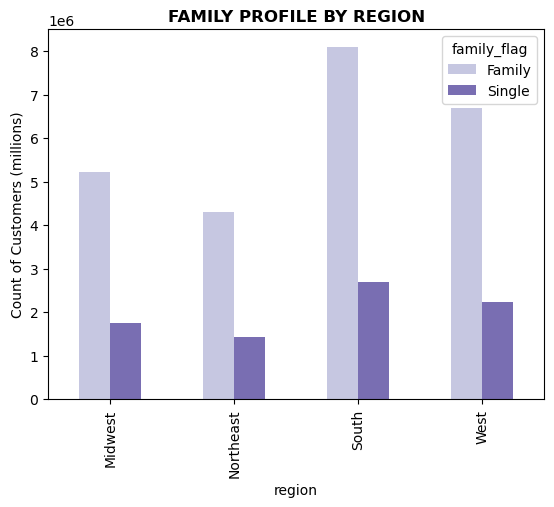

In [43]:
# create bar chart showing family_flag by region
region_family_bar=region_family.plot.bar(color=sns.color_palette('Purples',2))
plt.title('FAMILY PROFILE BY REGION',fontweight='bold')
plt.ylabel('Count of Customers (millions)')
plt.show()

In [56]:
# export the region_family_bar chart
region_family_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_family_bar.png'))

In [25]:
# create a crosstab between family_flag and department, normalized along the index
crosstab_dept_family_1=pd.crosstab(index=df_dept_age['department'],columns=df['family_flag'], normalize='index')

In [26]:
# create a second crosstab for labels on upcoming chart
crosstab_dept_family_2=pd.crosstab(index=df_dept_age['department'],columns=df['family_flag'])

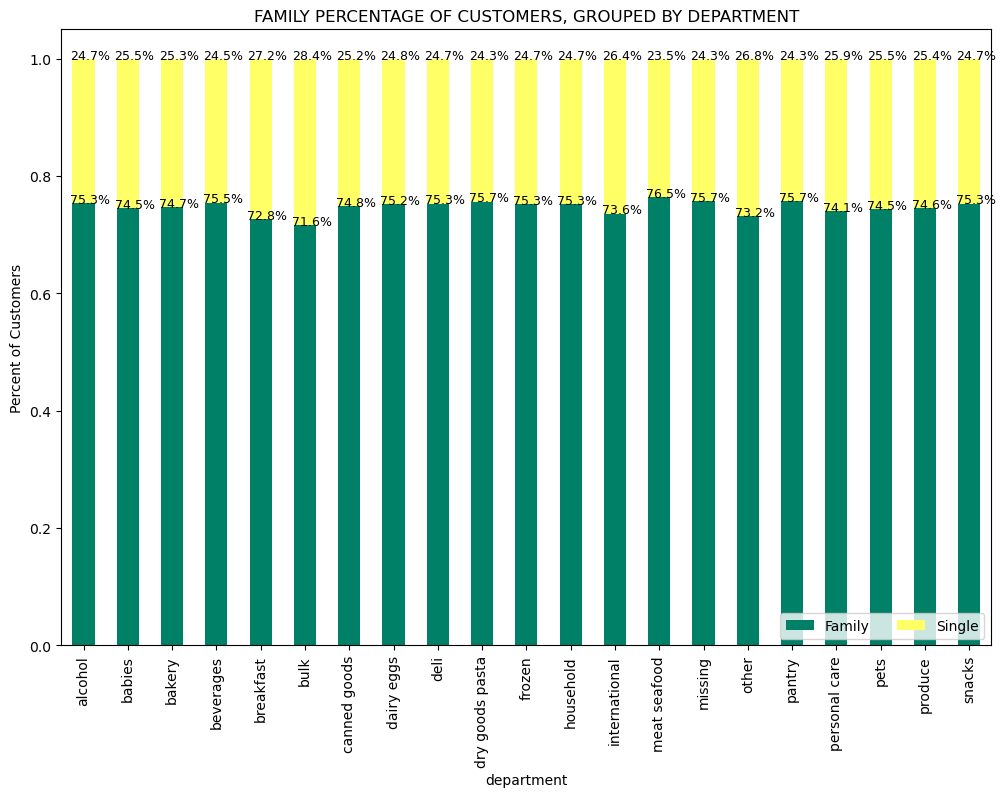

In [50]:
# create a normalized bar chart showing percentage of customers that have dependants vs no dependants, grouped by department
stacked_dept_family = crosstab_dept_family_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12,8))
plt.title('FAMILY PERCENTAGE OF CUSTOMERS, GROUPED BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('Percent of Customers')
# add text labels to the bar chart showing percentage of customers with dependants or no dependants for each department
for n, x in enumerate([*crosstab_dept_family_2.index.values]):
    for proportion, y_loc in zip(crosstab_dept_family_1.loc[x], crosstab_dept_family_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

In [52]:
# export the stacked_dept_family stacked bar chart
stacked_dept_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','department_percent_family.png'))

## Product Price Range

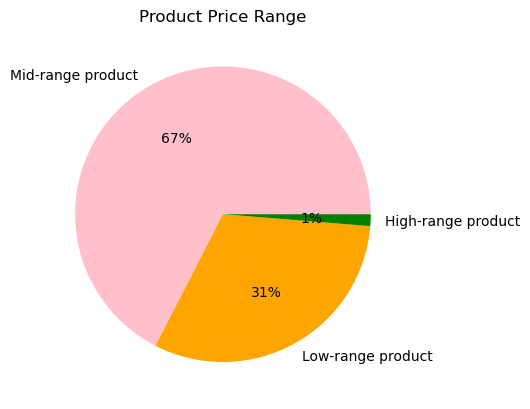

In [4]:
# create a pie chart showing product range percentages
price_range_pie = df['price_range_loc'].value_counts().plot.pie(title='Product Price Range',label='',autopct=('%1.f%%'),colors = ['pink','orange','green'])

In [5]:
# export the price_range_pie chart
price_range_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','price_range_pie.png'))

## Customer Loyalty Status, Ordering Habits

In [27]:
# create a crosstab between loyalty_flag and department, normalized along the index
crosstab_loyalty_dept_1=pd.crosstab(index=df_dept_age['department'],columns=df['loyalty_flag'], normalize='index')

In [28]:
# create a second crosstab for labels on upcoming chart
crosstab_loyalty_dept_2=pd.crosstab(index=df_dept_age['department'],columns=df['loyalty_flag'])

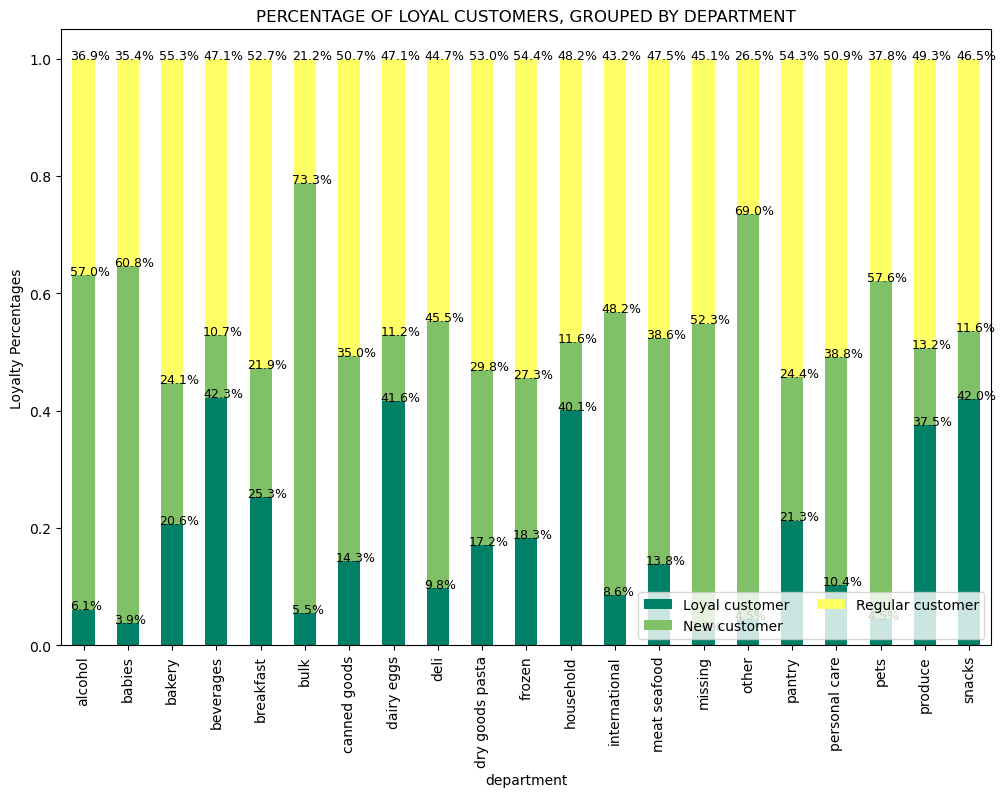

In [31]:
# create a normalized bar chart showing percentage of loyalty customers, grouped by department
stacked_loyalty_dept = crosstab_loyalty_dept_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12,8))
plt.title('PERCENTAGE OF LOYAL CUSTOMERS, GROUPED BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('Loyalty Percentages')
# add text labels to the bar chart showing percentages of loyalty customers for each department
for n, x in enumerate([*crosstab_loyalty_dept_2.index.values]):
    for proportion, y_loc in zip(crosstab_loyalty_dept_1.loc[x], crosstab_loyalty_dept_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

In [32]:
# export the stacked_loyalty_dept stacked bar chart
stacked_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stacked_loyalty_dpt.png'))

## Percentage of Customers per Region, by Department

In [29]:
# create a crosstab between region and department, normalized along the index
crosstab_region_dept_1=pd.crosstab(index=df_dept_age['department'],columns=df['region'], normalize='index')

In [30]:
# create a second crosstab for labels on upcoming chart
crosstab_region_dept_2=pd.crosstab(index=df_dept_age['department'],columns=df['region'])

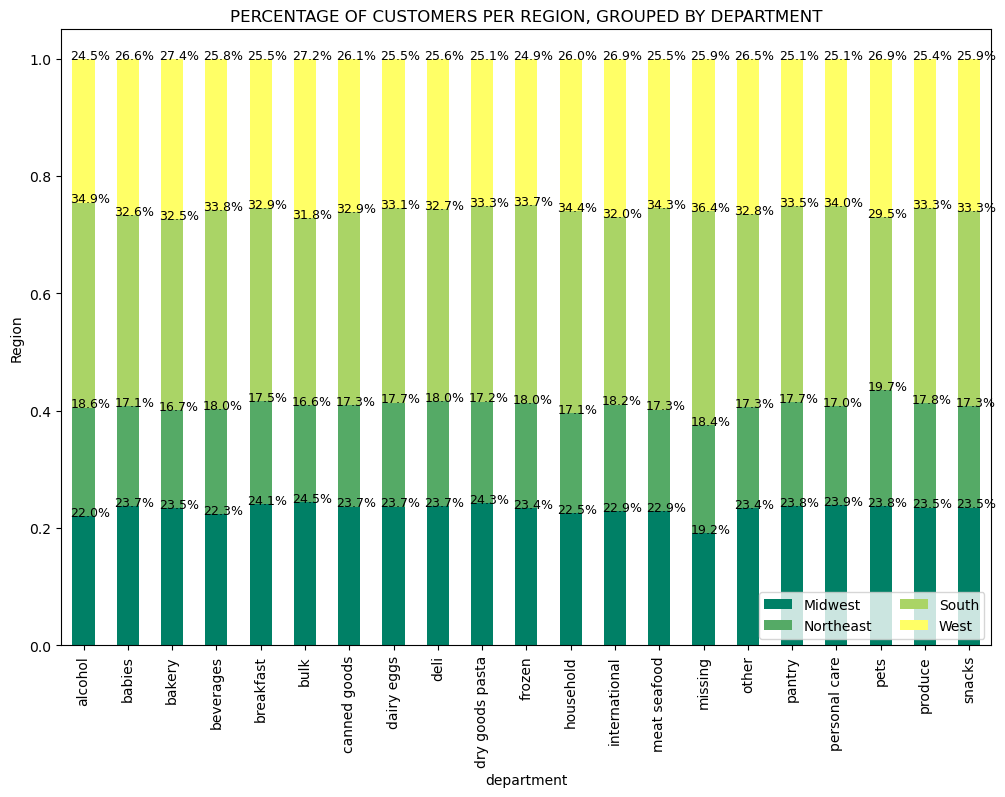

In [31]:
# create a normalized bar chart showing percentage of customers by region, grouped by department
stacked_region_dept = crosstab_region_dept_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12,8))
plt.title('PERCENTAGE OF CUSTOMERS PER REGION, GROUPED BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('Region')
# add text labels to the bar chart showing percentages of customers per region for each department
for n, x in enumerate([*crosstab_region_dept_2.index.values]):
    for proportion, y_loc in zip(crosstab_region_dept_1.loc[x], crosstab_region_dept_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

In [32]:
# export the stacked_region_dept stacked bar chart
stacked_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','stacked_region_dpt.png'))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_price              float64
 19  spending_flag           object 
 20  median_days             float64
 21  frequency_flag          objec

In [55]:
# export the final data
df.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_combined_data.pkl'))